# Twitter API

Twitter API v2

In [47]:
# Instalação das bibliotecas
!pip install pandas --quiet
!pip install tweepy --quiet
!pip install wordcloud --quiet

In [48]:
# Importando as bibliotecas
import pandas as pd
import tweepy
import matplotlib.pyplot as plt

In [49]:
# Autenticação
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAI5eawEAAAAA44CLt1X2B7JdocG3xNOd6EOIZz8%3DLC7Tda6LayP7HzbqJ3NQPDUQwy1JPCojNVBDAzRpz29Ud9SV2K'
client = tweepy.Client(bearer_token)

In [50]:
# Recuperando Tweets
response = client.search_recent_tweets("#Eleições2022 -#SOSBrasil", max_results=100)

In [51]:
# Imprimindo Tweets
tweets = response.data

for tweet in tweets:
    #print(tweet.id)
    print(tweet.text)

Lula - LulaOficial
Seguidores:3.252.088
Publicações últimos 7dias: 59
Total de likes: 644.725
Total de retweets: 68.877
#Eleicoes2022 #LulaPresidente2022
Jair M. Bolsonaro - jairbolsonaro
Seguidores:7.512.115
Publicações últimos 7dias: 40
Total de likes: 382.916
Total de retweets: 77.479
#Eleicoes2022 #BolsonaroPresidenteAte2026
João Doria - jdoriajr
Seguidores:1.531.145
Publicações últimos 7dias: 24
Total de likes: 50.888
Total de retweets: 3.296
#Eleicoes2022 #doriapresidente
Sergio Moro - SF_Moro
Seguidores:3.386.683
Publicações últimos 7dias: 26
Total de likes: 153.183
Total de retweets: 17.666
#Eleicoes2022 #MoroPresidente2022
Ciro Gomes - cirogomes
Seguidores:1.346.867
Publicações últimos 7dias: 70
Total de likes: 146.132
Total de retweets: 26.224
#Eleicoes2022 #Ciro2022
Acompanhamento do desempenho no Twitter dos principais candidatos para as eleições 2022! Faltam 183 dias para o primeiro turno!!
    #Eleicoes2022
Confira este pronunciamento de Eymael!

#democraciacristã #Eymael

In [52]:
# Agrupando os tweets em um dataframe
tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list,columns=['Texto'])
pd.options.display.max_colwidth = 130 
df.head()

,Texto
0,Lula - LulaOficial\nSeguidores:3.252.088\nPublicações últimos 7dias: 59\nTotal de likes: 644.725\nTotal de retweets: 68.877\n#...
1,Jair M. Bolsonaro - jairbolsonaro\nSeguidores:7.512.115\nPublicações últimos 7dias: 40\nTotal de likes: 382.916\nTotal de retw...
2,João Doria - jdoriajr\nSeguidores:1.531.145\nPublicações últimos 7dias: 24\nTotal de likes: 50.888\nTotal de retweets: 3.296\n...
3,Sergio Moro - SF_Moro\nSeguidores:3.386.683\nPublicações últimos 7dias: 26\nTotal de likes: 153.183\nTotal de retweets: 17.666...
4,Ciro Gomes - cirogomes\nSeguidores:1.346.867\nPublicações últimos 7dias: 70\nTotal de likes: 146.132\nTotal de retweets: 26.22...


In [53]:
# Agrupando os tweets em uma string única
string = pd.Series(df['Texto'].values).str.cat(sep=' ')
string

'Lula - LulaOficial\nSeguidores:3.252.088\nPublicações últimos 7dias: 59\nTotal de likes: 644.725\nTotal de retweets: 68.877\n#Eleicoes2022 #LulaPresidente2022 Jair M. Bolsonaro - jairbolsonaro\nSeguidores:7.512.115\nPublicações últimos 7dias: 40\nTotal de likes: 382.916\nTotal de retweets: 77.479\n#Eleicoes2022 #BolsonaroPresidenteAte2026 João Doria - jdoriajr\nSeguidores:1.531.145\nPublicações últimos 7dias: 24\nTotal de likes: 50.888\nTotal de retweets: 3.296\n#Eleicoes2022 #doriapresidente Sergio Moro - SF_Moro\nSeguidores:3.386.683\nPublicações últimos 7dias: 26\nTotal de likes: 153.183\nTotal de retweets: 17.666\n#Eleicoes2022 #MoroPresidente2022 Ciro Gomes - cirogomes\nSeguidores:1.346.867\nPublicações últimos 7dias: 70\nTotal de likes: 146.132\nTotal de retweets: 26.224\n#Eleicoes2022 #Ciro2022 Acompanhamento do desempenho no Twitter dos principais candidatos para as eleições 2022! Faltam 183 dias para o primeiro turno!!\n    #Eleicoes2022 Confira este pronunciamento de Eymael!

In [54]:
# Removendo caracteres especiais
caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

'Lula - LulaOficial\nSeguidores:3.252.088\nPublicações últimos 7dias: 59\nTotal de likes: 644.725\nTotal de retweets: 68.877\nEleicoes2022 LulaPresidente2022 Jair M. Bolsonaro - jairbolsonaro\nSeguidores:7.512.115\nPublicações últimos 7dias: 40\nTotal de likes: 382.916\nTotal de retweets: 77.479\nEleicoes2022 BolsonaroPresidenteAte2026 João Doria - jdoriajr\nSeguidores:1.531.145\nPublicações últimos 7dias: 24\nTotal de likes: 50.888\nTotal de retweets: 3.296\nEleicoes2022 doriapresidente Sergio Moro - SF_Moro\nSeguidores:3.386.683\nPublicações últimos 7dias: 26\nTotal de likes: 153.183\nTotal de retweets: 17.666\nEleicoes2022 MoroPresidente2022 Ciro Gomes - cirogomes\nSeguidores:1.346.867\nPublicações últimos 7dias: 70\nTotal de likes: 146.132\nTotal de retweets: 26.224\nEleicoes2022 Ciro2022 Acompanhamento do desempenho no Twitter dos principais candidatos para as eleições 2022! Faltam 183 dias para o primeiro turno!!\n    Eleicoes2022 Confira este pronunciamento de Eymael!\n\ndemocra

In [32]:
# Ignorando classes de palavras
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["Eleicoes2022","Eleições2022","RT","por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes','vai','que','ou','anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc'])

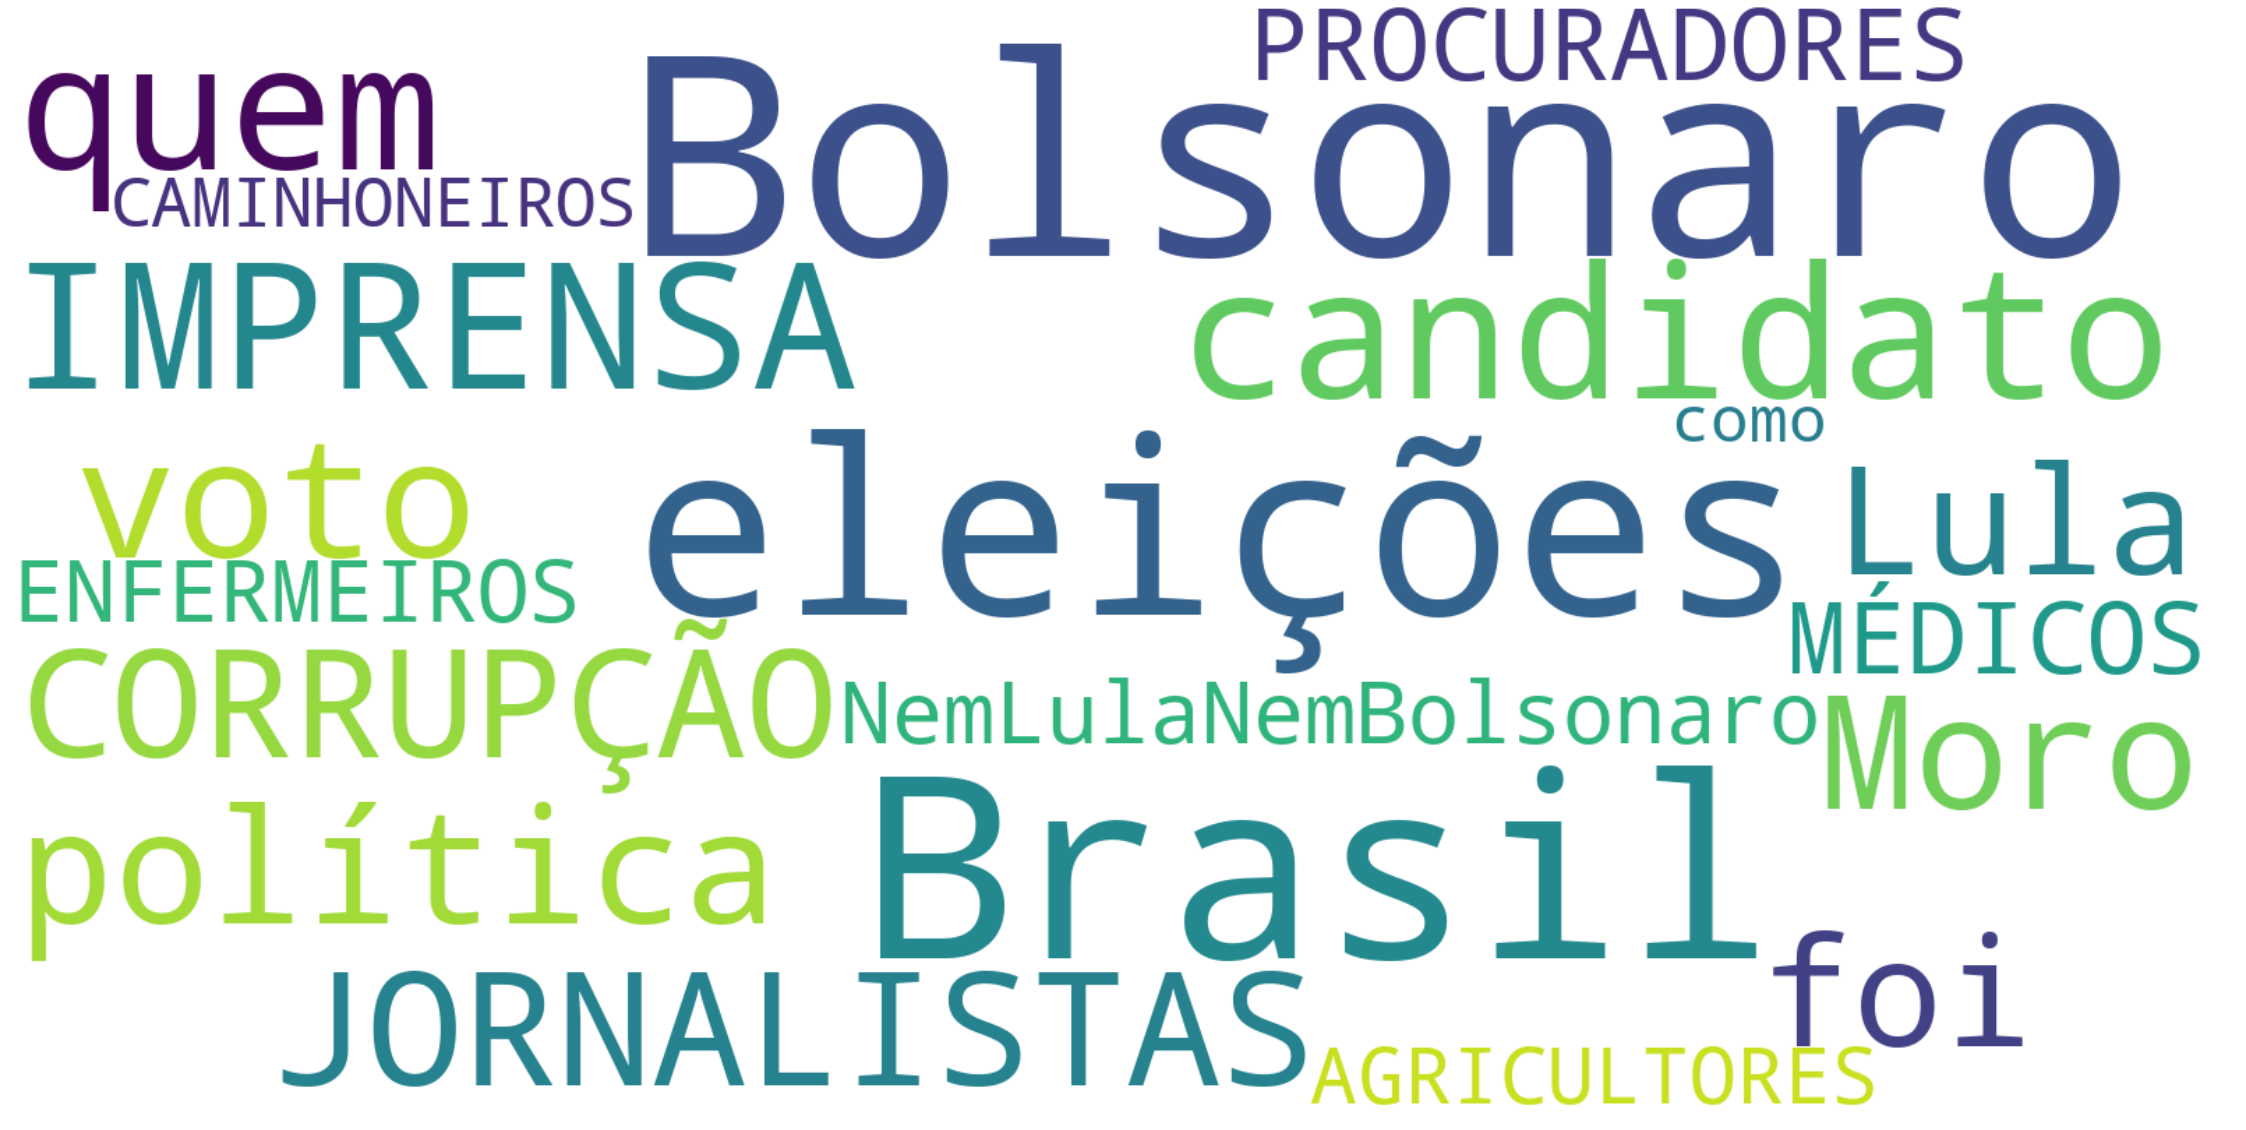

In [39]:
# Word Cloud com os textos dos tweets
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=20,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Autor

<a href="https://www.youtube.com/channel/UCa-d0hwYHOu6ehwc_oMjOoA" target="_blank">Alcides Lino (canal Programação e Liberdade)</a>

---

# Registro de Alterações (*Change Log*)

| Data (DD/MM/YYYY) | Versão  | Alterado Por | Descrição da Mudança                |
| ----------------- | ------- | ------------ | ----------------------------------- |
| 27/03/2022        | 1.0     | Alcides      | Versão inicial                      |